# Paraxial mesoderm organoids model development of human somites
https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE194214


In [ ]:
# Install dependencies
!pip install scanpy anndata

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Define the target folder inside your Drive
gdrive_path = "/content/drive/MyDrive/compscfiles/task3finalproject/raw"
!mkdir -p "$gdrive_path"

# Download the supplementary TAR file directly into that folder
!wget -O "$gdrive_path/GSE194214_RAW.tar" "https://ftp.ncbi.nlm.nih.gov/geo/series/GSE194nnn/GSE194214/suppl/GSE194214_RAW.tar"

# Extract the TAR file there
!tar -xvf "$gdrive_path/GSE194214_RAW.tar" -C "$gdrive_path"



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.5/144.5 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 30.1 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1
Mounted at /content/drive
--2025-05-06 15:30:51--  https://ftp.ncbi.nlm.nih.gov/geo/series/GSE194nnn/GSE194214/suppl/GSE194214_RAW.tar
Resolving ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)... 130.14.250.7, 130.14.250.10, 130.14.250.11, ...
Connecting to ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)|130.14.250.7|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 258877440 (247M) [application/x-tar]
Saving to: ‘/content/drive/MyDrive/compscfiles/task3finalproject/raw/GSE194214_RAW.tar’

In [ ]:
import os
import scanpy as sc
import gzip
import shutil

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Define paths
base_dir = "/content/drive/MyDrive/compscfiles"
raw_dir = os.path.join(base_dir, "task3finalproject", "raw")
save_dir = os.path.join(base_dir, "task3finalproject")
os.makedirs(save_dir, exist_ok=True)

# Define timepoints and prefixes
timepoints = {
    "day1": "GSM5830919_somitoid_d1",
    "day2": "GSM5830920_somitoid_d2",
    "day3": "GSM5830921_somitoid_d3",
    "day5": "GSM5830922_somitoid_d5"
}

# Decompress .gz files
def decompress_gz(file_path):
    output_path = file_path.replace(".gz", "")
    if not os.path.exists(output_path):
        with gzip.open(file_path, 'rb') as f_in:
            with open(output_path, 'wb') as f_out:
                shutil.copyfileobj(f_in, f_out)
    return output_path

# Load and save AnnData objects
adata = {}

for tp, prefix in timepoints.items():
    print(f"Processing {tp}...")

    # Build full paths to .gz files inside the raw directory
    barcodes_gz = os.path.join(raw_dir, f"{prefix}_barcodes.tsv.gz")
    features_gz = os.path.join(raw_dir, f"{prefix}_features.tsv.gz")
    matrix_gz   = os.path.join(raw_dir, f"{prefix}_matrix.mtx.gz")

    # Decompress
    barcodes_file = decompress_gz(barcodes_gz)
    features_file = decompress_gz(features_gz)
    matrix_file   = decompress_gz(matrix_gz)

    # Load into AnnData
    ad = sc.read_mtx(matrix_file).T
    ad.var_names = [line.strip().split('\t')[0] for line in open(features_file)]
    ad.obs_names = [line.strip() for line in open(barcodes_file)]
    ad.obs["timepoint"] = tp

    # Store and save
    adata[tp] = ad
    out_path = os.path.join(save_dir, f"somitoid_{tp}.h5ad")
    ad.write(out_path)
    print(f" Saved: {out_path}")

# Summary
print("\n All files processed and saved:")
for k in adata:
    print(f"  somitoid_{k}.h5ad → {adata[k].shape}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Processing day1...
 Saved: /content/drive/MyDrive/compscfiles/task3finalproject/somitoid_day1.h5ad
Processing day2...
 Saved: /content/drive/MyDrive/compscfiles/task3finalproject/somitoid_day2.h5ad
Processing day3...
 Saved: /content/drive/MyDrive/compscfiles/task3finalproject/somitoid_day3.h5ad
Processing day5...
 Saved: /content/drive/MyDrive/compscfiles/task3finalproject/somitoid_day5.h5ad

 All files processed and saved:
  somitoid_day1.h5ad → (2930, 33694)
  somitoid_day2.h5ad → (4977, 33694)
  somitoid_day3.h5ad → (5968, 33694)
  somitoid_day5.h5ad → (4841, 33694)


In [ ]:
!pip install scikit-misc


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.0/189.0 kB 3.0 MB/s eta 0:00:00


In [ ]:
!pip install igraph leidenalg


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 19.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 30.8 MB/s eta 0:00:00


#Somitoids Day 1 to 5 preprocessing

In [ ]:
!pip install mygene


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 3.2 MB/s eta 0:00:00


In [ ]:
import scanpy as sc
import pandas as pd
import numpy as np
from mygene import MyGeneInfo

# === Setup ===
timepoints = ["day1", "day2", "day3", "day5"]
base_path = "/content/drive/MyDrive/compscfiles/task3finalproject"
adata_dict = {}
mg = MyGeneInfo()

for tp in timepoints:
    print(f"\n Processing {tp}...")
    path = f"{base_path}/somitoid_{tp}.h5ad"
    adata = sc.read(path)

    # === Map Ensembl IDs to gene symbols ===
    ensembl_ids = adata.var_names.tolist()
    gene_info = mg.querymany(ensembl_ids, scopes='ensembl.gene', fields='symbol', species='human')
    gene_df = pd.DataFrame(gene_info)

    # FIX: Remove only rows where 'notfound' is explicitly True
    gene_df = gene_df[gene_df["notfound"] != True]
    gene_df = gene_df[~gene_df.duplicated(subset="query")]
    gene_df.set_index("query", inplace=True)

    adata.var["ensembl_id"] = adata.var_names
    adata.var = adata.var.join(gene_df[["symbol"]], on="ensembl_id")
    adata.var["symbol"] = adata.var["symbol"].fillna(adata.var["ensembl_id"])
    adata.var_names = adata.var["symbol"].astype(str)
    adata.var_names_make_unique()

    # === Add QC metrics ===
    adata.obs["n_counts"] = adata.X.sum(axis=1).A1 if hasattr(adata.X, 'A1') else adata.X.sum(axis=1)
    adata.obs["n_genes"] = (adata.X > 0).sum(axis=1).A1 if hasattr(adata.X, 'A1') else (adata.X > 0).sum(axis=1)
    adata.var["mt"] = adata.var_names.str.upper().str.startswith("MT-")
    sc.pp.calculate_qc_metrics(adata, qc_vars=["mt"], inplace=True)

    # Complexity = log10(genes) / log10(UMIs)
    adata.obs["complexity"] = np.log10(adata.obs["n_genes"]) / np.log10(adata.obs["total_counts"])

    # === Filter low-quality cells ===
    adata = adata[
        (adata.obs["n_counts"] >= 500) &
        (adata.obs["n_genes"] >= 200) &
        (adata.obs["pct_counts_mt"] <= 20) &
        (adata.obs["complexity"] >= 0.8)
    ].copy()

    # === Preprocessing ===
    adata.layers["counts"] = adata.X.copy()
    sc.pp.normalize_total(adata, target_sum=1e4)
    sc.pp.log1p(adata)
    sc.pp.highly_variable_genes(adata, flavor="seurat_v3", n_top_genes=3000, layer="counts")
    sc.pp.scale(adata)

    # PCA and neighbors (40 PCs as per paper)
    sc.tl.pca(adata, svd_solver="arpack", use_highly_variable=True)
    sc.pp.neighbors(adata, n_neighbors=30, n_pcs=40)

    # Leiden clustering and UMAP
    sc.tl.leiden(adata, resolution=0.8)
    sc.tl.umap(adata)

    # Add timepoint label
    adata.obs["timepoint"] = tp

    # Save in dictionary
    adata_dict[tp] = adata
    print(f" {tp} done: {adata.shape[0]} cells")

# Optional: Save preprocessed files
# for tp, ad in adata_dict.items():
#     ad.write(f"{base_path}/somitoid_{tp}_preprocessed.h5ad")



 Processing day1...


INFO:biothings.client:querying 1-1000 ...
INFO:biothings.client:querying 1001-2000 ...
INFO:biothings.client:querying 2001-3000 ...
INFO:biothings.client:querying 3001-4000 ...
INFO:biothings.client:querying 4001-5000 ...
INFO:biothings.client:querying 5001-6000 ...
INFO:biothings.client:querying 6001-7000 ...
INFO:biothings.client:querying 7001-8000 ...
INFO:biothings.client:querying 8001-9000 ...
INFO:biothings.client:querying 9001-10000 ...
INFO:biothings.client:querying 10001-11000 ...
INFO:biothings.client:querying 11001-12000 ...
INFO:biothings.client:querying 12001-13000 ...
INFO:biothings.client:querying 13001-14000 ...
INFO:biothings.client:querying 14001-15000 ...
INFO:biothings.client:querying 15001-16000 ...
INFO:biothings.client:querying 16001-17000 ...
INFO:biothings.client:querying 17001-18000 ...
INFO:biothings.client:querying 18001-19000 ...
INFO:biothings.client:querying 19001-20000 ...
INFO:biothings.client:querying 20001-21000 ...
INFO:biothings.client:querying 2100

 day1 done: 2908 cells

 Processing day2...


INFO:biothings.client:querying 1-1000 ...
INFO:biothings.client:querying 1001-2000 ...
INFO:biothings.client:querying 2001-3000 ...
INFO:biothings.client:querying 3001-4000 ...
INFO:biothings.client:querying 4001-5000 ...
INFO:biothings.client:querying 5001-6000 ...
INFO:biothings.client:querying 6001-7000 ...
INFO:biothings.client:querying 7001-8000 ...
INFO:biothings.client:querying 8001-9000 ...
INFO:biothings.client:querying 9001-10000 ...
INFO:biothings.client:querying 10001-11000 ...
INFO:biothings.client:querying 11001-12000 ...
INFO:biothings.client:querying 12001-13000 ...
INFO:biothings.client:querying 13001-14000 ...
INFO:biothings.client:querying 14001-15000 ...
INFO:biothings.client:querying 15001-16000 ...
INFO:biothings.client:querying 16001-17000 ...
INFO:biothings.client:querying 17001-18000 ...
INFO:biothings.client:querying 18001-19000 ...
INFO:biothings.client:querying 19001-20000 ...
INFO:biothings.client:querying 20001-21000 ...
INFO:biothings.client:querying 2100

 day2 done: 4952 cells

 Processing day3...


INFO:biothings.client:querying 1-1000 ...
INFO:biothings.client:querying 1001-2000 ...
INFO:biothings.client:querying 2001-3000 ...
INFO:biothings.client:querying 3001-4000 ...
INFO:biothings.client:querying 4001-5000 ...
INFO:biothings.client:querying 5001-6000 ...
INFO:biothings.client:querying 6001-7000 ...
INFO:biothings.client:querying 7001-8000 ...
INFO:biothings.client:querying 8001-9000 ...
INFO:biothings.client:querying 9001-10000 ...
INFO:biothings.client:querying 10001-11000 ...
INFO:biothings.client:querying 11001-12000 ...
INFO:biothings.client:querying 12001-13000 ...
INFO:biothings.client:querying 13001-14000 ...
INFO:biothings.client:querying 14001-15000 ...
INFO:biothings.client:querying 15001-16000 ...
INFO:biothings.client:querying 16001-17000 ...
INFO:biothings.client:querying 17001-18000 ...
INFO:biothings.client:querying 18001-19000 ...
INFO:biothings.client:querying 19001-20000 ...
INFO:biothings.client:querying 20001-21000 ...
INFO:biothings.client:querying 2100

 day3 done: 5961 cells

 Processing day5...


INFO:biothings.client:querying 1-1000 ...
INFO:biothings.client:querying 1001-2000 ...
INFO:biothings.client:querying 2001-3000 ...
INFO:biothings.client:querying 3001-4000 ...
INFO:biothings.client:querying 4001-5000 ...
INFO:biothings.client:querying 5001-6000 ...
INFO:biothings.client:querying 6001-7000 ...
INFO:biothings.client:querying 7001-8000 ...
INFO:biothings.client:querying 8001-9000 ...
INFO:biothings.client:querying 9001-10000 ...
INFO:biothings.client:querying 10001-11000 ...
INFO:biothings.client:querying 11001-12000 ...
INFO:biothings.client:querying 12001-13000 ...
INFO:biothings.client:querying 13001-14000 ...
INFO:biothings.client:querying 14001-15000 ...
INFO:biothings.client:querying 15001-16000 ...
INFO:biothings.client:querying 16001-17000 ...
INFO:biothings.client:querying 17001-18000 ...
INFO:biothings.client:querying 18001-19000 ...
INFO:biothings.client:querying 19001-20000 ...
INFO:biothings.client:querying 20001-21000 ...
INFO:biothings.client:querying 2100

 day5 done: 4823 cells


In [ ]:
import os

base_path = "/content/drive/MyDrive/compscfiles/task3finalproject"
files = os.listdir(base_path)

print(" Available files:")
for f in files:
    if f.endswith(".h5ad"):
        print(" -", f)



 Available files:
 - somitoid_day1_preprocessed_labeled.h5ad
 - somitoid_day2_preprocessed_labeled.h5ad
 - somitoid_day3_preprocessed_labeled.h5ad
 - somitoid_day5_preprocessed_labeled.h5ad
 - somitoid_all_timepoints_combined_raw.h5ad
 - GSE195467_combined_raw_unlabeled.h5ad
 - GSE195467_combined_raw_labeled.h5ad
 - GSE114186_hsIPSC_adata.h5ad
 - somitoid_day1.h5ad
 - somitoid_day2.h5ad
 - somitoid_day3.h5ad
 - somitoid_day5.h5ad
 - somitoid_all_timepoints_combined_annotated.h5ad
 - somitoid_day1_processed.h5ad
 - somitoid_day2_processed.h5ad
 - somitoid_day3_processed.h5ad
 - somitoid_day5_processed.h5ad


 UMAP for day1 (n=2908 cells):


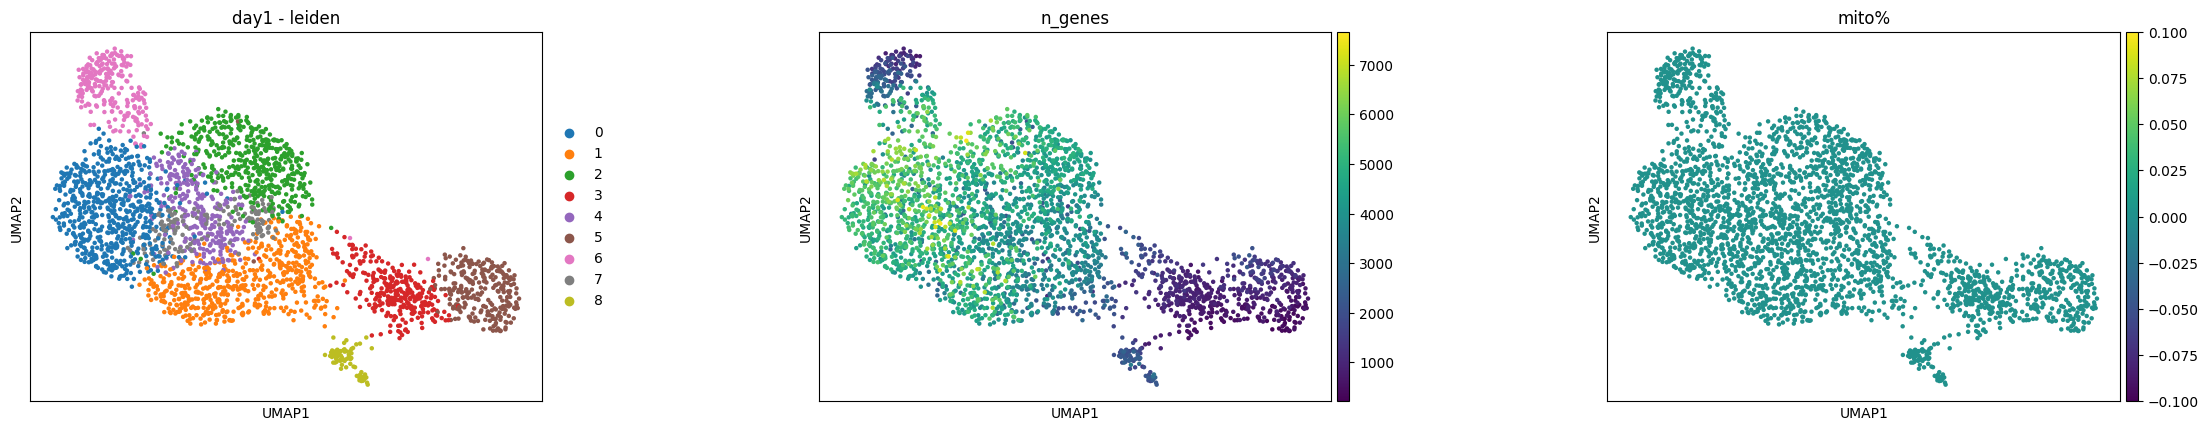

 UMAP for day2 (n=4952 cells):


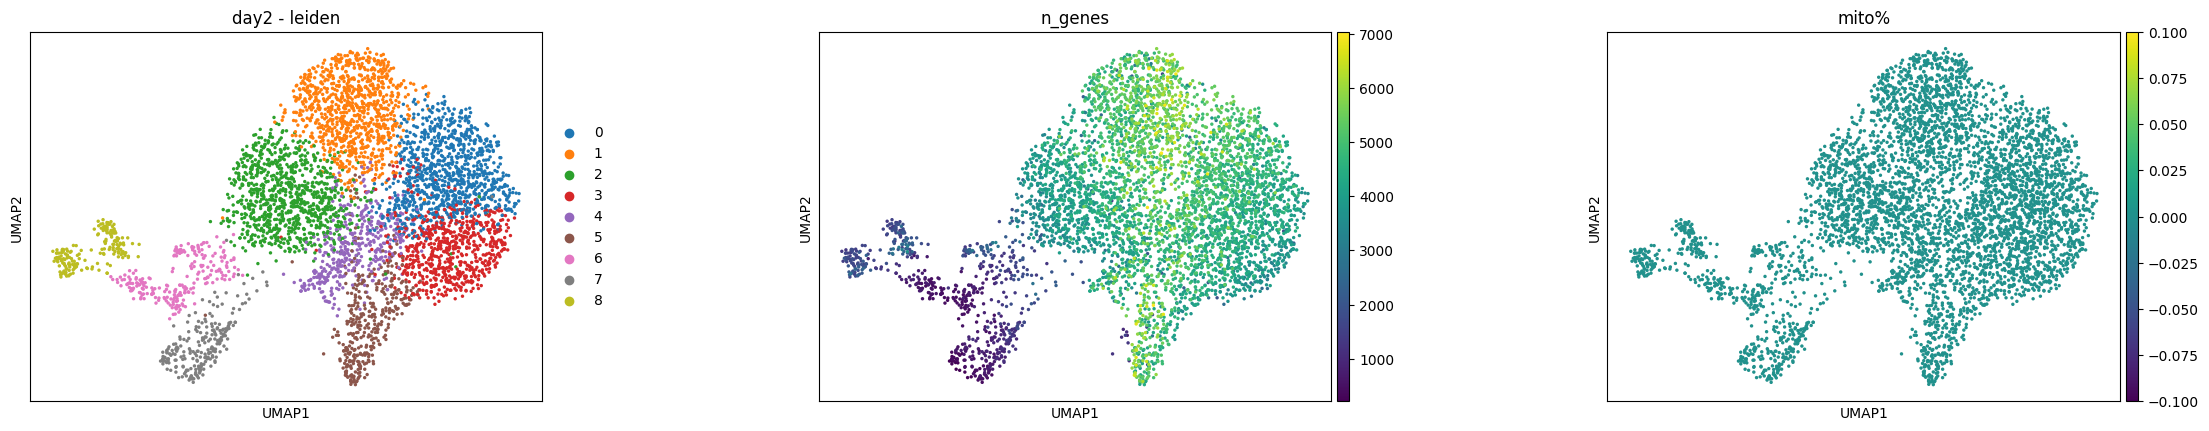

 UMAP for day3 (n=5961 cells):


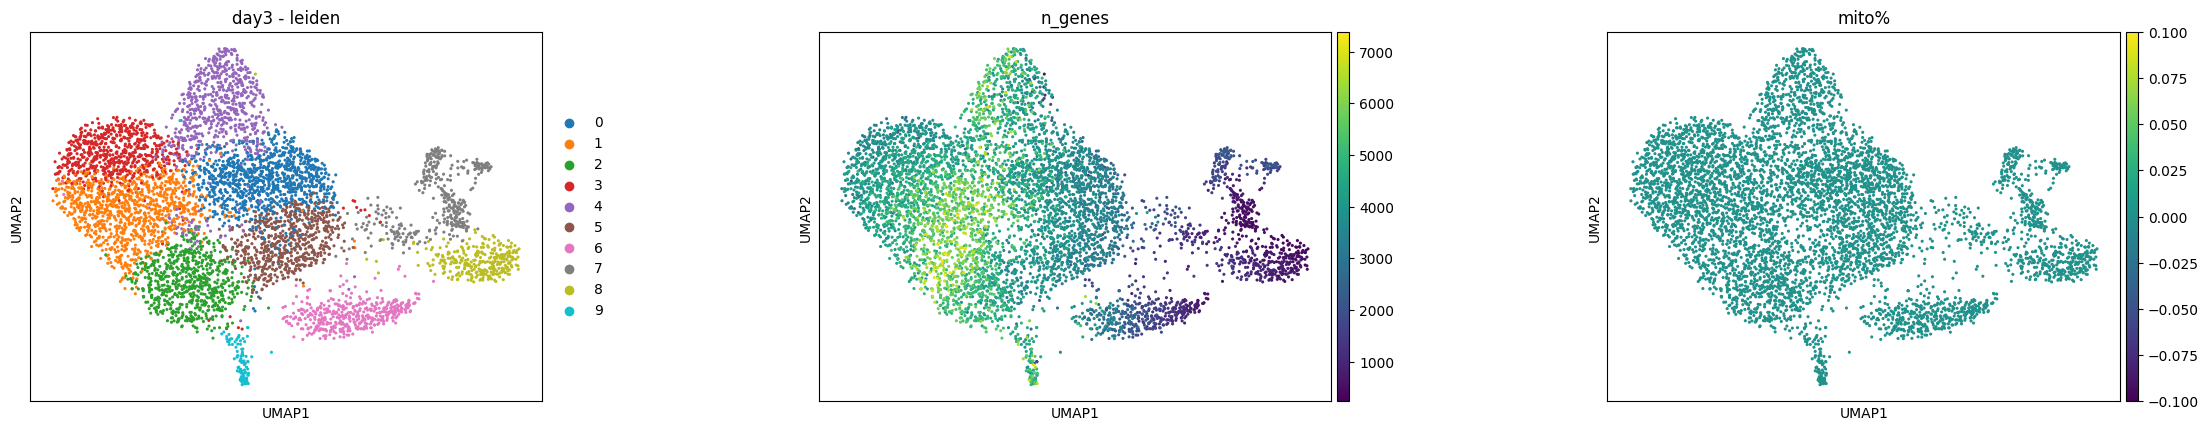

 UMAP for day5 (n=4823 cells):


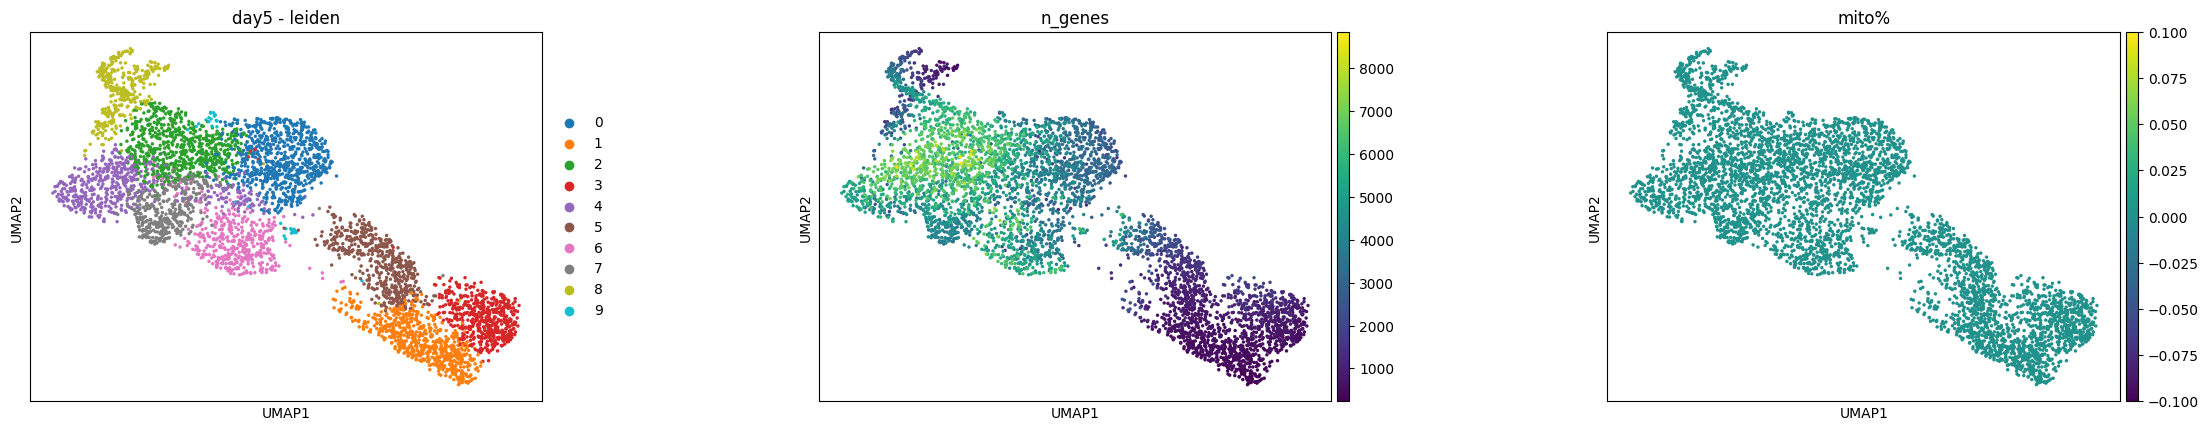

In [ ]:
import matplotlib.pyplot as plt

for tp, ad in adata_dict.items():
    print(f" UMAP for {tp} (n={ad.shape[0]} cells):")
    sc.pl.umap(ad, color=["leiden", "n_genes", "pct_counts_mt"], title=[f"{tp} - leiden", "n_genes", "mito%"], wspace=0.4)


In [ ]:
import scanpy as sc
import os

# Define base directory and files
base_dir = "/content/drive/MyDrive/compscfiles/task3finalproject"
timepoints = ["day1", "day2", "day3", "day5"]

# Load and label
adatas = []
for tp in timepoints:
    path = os.path.join(base_dir, f"somitoid_{tp}.h5ad")
    ad = sc.read(path)
    ad.obs["timepoint"] = tp
    adatas.append(ad)

# Concatenate
adata_combined = adatas[0].concatenate(adatas[1:], batch_key="original_batch", batch_categories=timepoints)

# Save
combined_path = os.path.join(base_dir, "somitoid_all_timepoints_combined_raw.h5ad")
adata_combined.write(combined_path)
print(f" Combined AnnData saved to:\n{combined_path}")


<ipython-input-10-2ecda7331932>:17: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_combined = adatas[0].concatenate(adatas[1:], batch_key="original_batch", batch_categories=timepoints)


 Combined AnnData saved to:
/content/drive/MyDrive/compscfiles/task3finalproject/somitoid_all_timepoints_combined_raw.h5ad


In [ ]:
import scanpy as sc
import pandas as pd

# Load the combined file
adata_combined = sc.read("/content/drive/MyDrive/compscfiles/task3finalproject/somitoid_all_timepoints_combined_raw.h5ad")

# Summary info
print(" Combined AnnData")
print(f" - Shape: {adata_combined.shape[0]} cells × {adata_combined.shape[1]} genes")
print(f" - Timepoints (from 'batch'): {adata_combined.obs['original_batch'].unique().tolist()}")
print(f" - Columns in .obs: {list(adata_combined.obs.columns)}")
print(f" - Columns in .var: {list(adata_combined.var.columns)}")
print(f" - Layers: {list(adata_combined.layers.keys()) if hasattr(adata_combined, 'layers') else 'None'}")
print(f" - Embeddings: {list(adata_combined.obsm.keys()) if hasattr(adata_combined, 'obsm') else 'None'}")



 Combined AnnData
 - Shape: 18716 cells × 33694 genes
 - Timepoints (from 'batch'): ['day1', 'day2', 'day3', 'day5']
 - Columns in .obs: ['timepoint', 'original_batch']
 - Columns in .var: []
 - Layers: []
 - Embeddings: []


# Reconstruction of human Somitogenesis with pluripotent stem cells
https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE195467


In [ ]:
# === Step 1: Install dependencies ===
!pip install scanpy anndata

# === Step 2: Mount Google Drive ===
from google.colab import drive
drive.mount('/content/drive')

# === Step 3: Define target folder ===
gdrive_path = "/content/drive/MyDrive/compscfiles/task3finalproject/raw_GSE195467"
!mkdir -p "$gdrive_path"

# === Step 4: Download the new GSE195467_RAW.tar file ===
!wget -O "$gdrive_path/GSE195467_RAW.tar" "https://ftp.ncbi.nlm.nih.gov/geo/series/GSE195nnn/GSE195467/suppl/GSE195467_RAW.tar"

# === Step 5: Extract top-level TAR ===
!tar -xvf "$gdrive_path/GSE195467_RAW.tar" -C "$gdrive_path"


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
--2025-05-06 00:17:12--  https://ftp.ncbi.nlm.nih.gov/geo/series/GSE195nnn/GSE195467/suppl/GSE195467_RAW.tar
Resolving ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)... 130.14.250.31, 130.14.250.7, 130.14.250.10, ...
Connecting to ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)|130.14.250.31|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 347811840 (332M) [application/x-tar]
Saving to: ‘/content/drive/MyDrive/compscfiles/task3finalproject/raw_GSE195467/GSE195467_RAW.tar’

/content/drive/MyDr 100%[===================>] 331.70M  43.4MB/s    in 8.6s    

2025-05-06 00:17:21 (38.7 MB/s) - ‘/content/drive/MyDrive/compscfiles/task3finalproject/raw_GSE195467/GSE195467_RAW.tar’ saved [347811840/347811840]

GSM5837936_sample1_t1.tar.gz
GSM5837937_sample1_t2.tar.gz
GSM5837938_sample1_t3.tar.gz
GSM5837939_sample1_t4.tar.gz
GSM5837940_sample2_t1.tar.gz

In [ ]:
import scanpy as sc
import os

# Define directories
base_dir = "/content/drive/MyDrive/compscfiles/task3finalproject"
raw_dir = os.path.join(base_dir, "raw_GSE195467")
extracted_dir = os.path.join(raw_dir, "extracted_samples")

# Load each extracted sample folder and concatenate
adata_list = []
sample_folders = sorted([f for f in os.listdir(extracted_dir) if os.path.isdir(os.path.join(extracted_dir, f))])

for folder in sample_folders:
    folder_path = os.path.join(extracted_dir, folder)

    # Check if nested folder exists
    inner_items = os.listdir(folder_path)
    nested_subdirs = [d for d in inner_items if os.path.isdir(os.path.join(folder_path, d))]
    if nested_subdirs:
        folder_path = os.path.join(folder_path, nested_subdirs[0])  # Use inner subfolder

    try:
        print(f" Reading {folder_path} ...")
        ad = sc.read_10x_mtx(folder_path, var_names="gene_ids", cache=True)
        ad.var_names_make_unique()
        ad.obs["source_folder"] = folder
        adata_list.append(ad)
    except Exception as e:
        print(f" Failed to load {folder}: {e}")

# Concatenate all loaded samples
if adata_list:
    combined = adata_list[0].concatenate(adata_list[1:], batch_key="original_batch", batch_categories=sample_folders)
    out_path = os.path.join(base_dir, "GSE195467_combined_raw_unlabeled.h5ad")
    combined.write(out_path)
    print(f" Combined AnnData saved to:\n{out_path}")
else:
    print(" No valid samples loaded. Nothing was saved.")


 Reading /content/drive/MyDrive/compscfiles/task3finalproject/raw_GSE195467/extracted_samples/GSM5837936_sample1_t1/sample1_t1 ...
 Reading /content/drive/MyDrive/compscfiles/task3finalproject/raw_GSE195467/extracted_samples/GSM5837937_sample1_t2/sample1_t2 ...
 Reading /content/drive/MyDrive/compscfiles/task3finalproject/raw_GSE195467/extracted_samples/GSM5837938_sample1_t3/sample1_t3 ...
 Reading /content/drive/MyDrive/compscfiles/task3finalproject/raw_GSE195467/extracted_samples/GSM5837939_sample1_t4/sample1_t4 ...
 Reading /content/drive/MyDrive/compscfiles/task3finalproject/raw_GSE195467/extracted_samples/GSM5837940_sample2_t1/sample2_t1 ...
 Reading /content/drive/MyDrive/compscfiles/task3finalproject/raw_GSE195467/extracted_samples/GSM5837941_sample2_t2/sample2_t2 ...
 Reading /content/drive/MyDrive/compscfiles/task3finalproject/raw_GSE195467/extracted_samples/GSM5837942_sample2_t3/sample2_t3 ...
 Reading /content/drive/MyDrive/compscfiles/task3finalproject/raw_GSE195467/extract

<ipython-input-12-77122dfd66b7>:33: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  combined = adata_list[0].concatenate(adata_list[1:], batch_key="original_batch", batch_categories=sample_folders)


 Combined AnnData saved to:
/content/drive/MyDrive/compscfiles/task3finalproject/GSE195467_combined_raw_unlabeled.h5ad


In [ ]:
import scanpy as sc
adata = sc.read("/content/drive/MyDrive/compscfiles/task3finalproject/GSE195467_combined_raw_unlabeled.h5ad")
print(adata)
print(adata.obs["original_batch"].value_counts())


AnnData object with n_obs × n_vars = 21114 × 36601
    obs: 'source_folder', 'original_batch'
    var: 'gene_symbols', 'feature_types'
original_batch
GSM5837943_sample3_t1    3768
GSM5837944_sample3_t2    3598
GSM5837941_sample2_t2    2755
GSM5837940_sample2_t1    2651
GSM5837942_sample2_t3    2178
GSM5837936_sample1_t1    1779
GSM5837939_sample1_t4    1697
GSM5837937_sample1_t2    1388
GSM5837938_sample1_t3    1300
Name: count, dtype: int64
